
 Numpy
  - Vectorization
  - Boardcast
  - Identify Matrix
  - Indexing and Slicing
  - Fancy Array
  - Reduction Operation

# Basic Section (Start)


In [4]:
import numpy as np

## Numpy (Review)

Main object type is `np.array`

Many ways to create it,

One way is to convert a python list

In [ ]:
python_list = [1, 2, 3]
arr = np.array(python_list)
arr

In [ ]:
arr**2

In [ ]:
python_list**2 #__pow__

In [10]:
# class.function(self, args) = instance.function(args)

In [ ]:
# Magic Function with __XXX__
# arr.__pow__(2)
python_list.__pow__(2)

Many times a list comprehension is used to create a list and then converted to a array

In [ ]:
python_list_pow = [i**2 for i in python_list]  # list comprehension
python_list_pow

In [ ]:
# Extend the behavior of built-in class use inheritance
# not directly changing it
class PowerList(list):
    def __pow__(self, exponent):
        print("I am called __pow___ for powerlist")
        if not isinstance(exponent, int):
            raise ValueError("Exponent must be an integer")
        return [i**2 for i in self]

my_list = PowerList()
my_list.extend([1,2,3])
print("Original list:", my_list)

powered_list = my_list ** 2
print("List to the power of 2:", powered_list)


### Exercise (Pre-Lec)
Create a numpy array that contain  intergers i  such that  0<i<100 and $2^i$ has the last digit 6

In [ ]:
arr1 = np.array([i for i in range(1,100) if 2**i%10 == 6])


Create a 2D numpy array $A$ (5,10) such that $A_{ij} = i\times j$

In [ ]:
arr1= np.arange(5).reshape(-1,1) 
arr2 = np.arange(10).reshape(1,-1)
target = arr1 * arr2

## Another way to create a numpy array is with initializing functions

- np.zeros
- np.ones
- np.arange

These functions along with `reshape` can be used to create initial matrix without any for loops

In [1]:
np.zeros(shape = (10, 10))

NameError: name 'np' is not defined

In [ ]:
np.ones((10, 10)) * 2

In [ ]:
np.arange(2, 10, 2)  # equivalent to range(2,10,2)

### Exercise (In Lec)

Create an array of first 10 powers of 2

### 1D vs 2D array

In [ ]:
array1D = np.arange(10) * np.arange(10)
array1D = array1D.reshape(1,-1)
print(array1D.shape)
array1D

In [ ]:
array2D = np.arange(10).reshape(10, 1)
print(array2D.shape)
array2D

In [ ]:
array2D + array1D #boardcasting

### Distinction between numpy 1D arrays and numpy 2D arrays

This tends to cause a lot of confusion for new numpy users.
Follow the below examples carefully to understand the distinction.

In [ ]:
Z = np.zeros(shape=10)
print(Z)
Z.shape

In [ ]:
# Create 2D array by reshape
Z = np.zeros(10).reshape(10, 1)
print(Z)
Z.shape

In [ ]:
Z.squeeze()  # remove axis with length = 1

In [ ]:
# squeeze Remove axes of length one
Z = np.zeros(6).reshape(1, 1, 2, 3)
print(Z)
print(Z.shape, "\n")

Z_squeeze = Z.squeeze()
print(Z_squeeze)
print(Z_squeeze.shape)

In [ ]:
# Matrix Multiplication
Mat = np.random.randn(10, 10)
Mat.shape

In [ ]:
Z = np.arange(10).reshape(10, 1)
print(Z)
print(Z.shape)

In [ ]:
# (N, M) @ (M, K) = (N, K)
Mat @ Z

In [ ]:
Z = np.arange(10).reshape(1, 10)

print(Mat.shape)
print(Z.shape)

# (N, M) @ (M, K) = (N, K)
Mat @ Z  # (10, 10) @ (1, 10) NOT WORKING

In [ ]:
(Z @ Mat).shape

In [ ]:
# array variable is also a pointer
x = np.zeros((5, 5))
y = x.copy()
x[1, 1] = 2

y

## Array Broadcasting

Normally you only do arithmetic operations between arrays of the same dimension

The smaller array of at least 1 dimension of size 1 is “broadcast” across the larger array so that they have compatible shapes by dimension.

In [ ]:
a = np.arange(3).reshape(1, 3)
b = np.arange(6).reshape(6, 1)
c = np.ones((3, 3))
d = np.zeros((6, 3))
print(a, "\n")
print(b, "\n")
print(c, "\n")
print(d, "\n")

In [ ]:
# c + 2
# c + c
# d + a
# c + d
b + d

In [ ]:
a + b

In [ ]:
X = np.arange(4).reshape(-1, 1) * 10
Y = np.arange(3).reshape(1, -1)
print(X.shape)
print(Y.shape, "\n")
print(X, "\n")
print(Y, "\n")
X + Y

it tries to duplicates every x’s col and y’s row (dim size = 1) to match the other arrays
1. Make the two arrays have the same number of dimensions.
  - If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.

2. If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

![](http://scipy-lectures.org/_images/numpy_broadcasting.png)

### Exercise (In-Lecture)
create a 2D numpy array $A$ (shape = (5,10) ) such that $A_{ij} = i\times j$, but without using list comprehensions. Use broadcasting instead


In [5]:
# hint: check how it looks for
#       np.arange(5).reshape(-1,1)
#       np.arange(10).reshape(1,-1)
arr1= np.arange(5).reshape(-1,1) 
arr2 = np.arange(10).reshape(1,-1)
target = arr1 * arr2
print(target)

[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]]


Use array broadcasting to create a (10,10) numpy array with values
$$ A_{ij} = 2^i + j $$

In [7]:
# Hint: Check the values of
#       2**(np.arange(10).reshape(-1,1))
#       np.arange(10).reshape(1,-1)
arr1 = np.arange(10).reshape(-1,1)
arr1=2**arr1
arr2=np.arange(10).reshape(1,-1)
target = arr1+arr2
target

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   3,   4,   5,   6,   7,   8,   9,  10,  11],
       [  4,   5,   6,   7,   8,   9,  10,  11,  12,  13],
       [  8,   9,  10,  11,  12,  13,  14,  15,  16,  17],
       [ 16,  17,  18,  19,  20,  21,  22,  23,  24,  25],
       [ 32,  33,  34,  35,  36,  37,  38,  39,  40,  41],
       [ 64,  65,  66,  67,  68,  69,  70,  71,  72,  73],
       [128, 129, 130, 131, 132, 133, 134, 135, 136, 137],
       [256, 257, 258, 259, 260, 261, 262, 263, 264, 265],
       [512, 513, 514, 515, 516, 517, 518, 519, 520, 521]])

# Basic Section (End)

## Matrix creation

There are some functions to create standard matrices

In [ ]:
np.eye(5)

In [ ]:
np.arange(10)

In [ ]:
# np.diag: Extract a diagonal or construct a diagonal array.
M = np.diag(np.arange(10))  # .reshape(5,20)
M

In [ ]:
np.diag(M)

In [ ]:
# Transpose of the matrix
A = np.arange(15).reshape(5, 3)
print(A.shape)
A

In [ ]:
A.T

In [ ]:
A.transpose()

### random seed

In [ ]:
np.random.rand(5, 5)

In [ ]:
np.random.seed(0)  # control the random state
print(np.random.rand(5, 5))
print(np.random.rand(5, 5))
print(np.random.rand(5, 5))

### Exercise (Post Lecture)

Create this matrix   

```python
array([[5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 4., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 4., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 5.]])
```

In [8]:
target = np.ones((11,11))+np.diag([4,3,2,1,0,-1,0,1,2,3,4])
target

array([[5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 4., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 4., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 5.]])

## Array Indexing and Slicing

In [ ]:
import numpy as np

arr = np.arange(10)
arr

In [ ]:
arr[5]

In [ ]:
arr[-3]

In [ ]:
arr[3:7]

In [ ]:
arr[2:]

In [ ]:
arr[0:-3]

In [ ]:
arr[0:6:2]  # similar as range(0,6,2)

In [ ]:
arr[5:0:-2]

In [ ]:
arr[::-1]

In [ ]:
arr[:]

In [ ]:
arr

In [ ]:
a = 10 * np.arange(6).reshape(-1, 1) + np.arange(6)
print(a)
# a[4:, 4:]

Can use all the above slicing methods for each dimension of a multidemnsional array
![](http://scipy-lectures.org/_images/numpy_indexing.png)

try it yourself

### Exercise (Post-Lecture)
Create the following matrix, using `np.ones()`, `np.zeros()`, and slicing
```python
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
```

In [9]:
target= np.ones((10,10))
target[2:8,2:8]=0
target

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

Create the following matrix
```python
array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1.,  0.,  1.,  2.,  3.,  4., -1., -1., -1., -1.],
       [-1.,  5.,  6.,  7.,  8.,  9., -1., -1., -1., -1.],
       [-1., 10., 11., 12., 13., 14., -1., -1., -1., -1.],
       [-1., 15., 16., 17., 18., 19., -1., -1., -1., -1.],
       [-1., 20., 21., 22., 23., 24., -1., -1., -1., -1.],
       [-1., 25., 26., 27., 28., 29., -1., -1., -1., -1.],
       [-1., 30., 31., 32., 33., 34., -1., -1., -1., -1.],
       [-1., 35., 36., 37., 38., 39., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])
```

In [10]:
target = np.full((10, 10), -1)
target[1:9, 1:6] = np.arange(40).reshape(8, 5)
target

array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1,  0,  1,  2,  3,  4, -1, -1, -1, -1],
       [-1,  5,  6,  7,  8,  9, -1, -1, -1, -1],
       [-1, 10, 11, 12, 13, 14, -1, -1, -1, -1],
       [-1, 15, 16, 17, 18, 19, -1, -1, -1, -1],
       [-1, 20, 21, 22, 23, 24, -1, -1, -1, -1],
       [-1, 25, 26, 27, 28, 29, -1, -1, -1, -1],
       [-1, 30, 31, 32, 33, 34, -1, -1, -1, -1],
       [-1, 35, 36, 37, 38, 39, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]])

# Fancy Array Indexing

We can use numpy arrays as an index for other numpy arrays

In [ ]:
arr = np.arange(10)
arr

In [ ]:
# use array/list/tuple as indexs
idx = np.array([2, 7, -1])
idx

In [ ]:
print(arr[idx])
arr[idx] = -1
arr

In [ ]:
# use bool array
arr < 0

In [ ]:
arr[arr < 0] = 100
arr

For multidimensional array, array indexing works different from slicing

In [ ]:
X = np.zeros((6, 6))
X[2:5, 0:3] = 1
X

In [ ]:
np.arange(2, 5), np.arange(0, 3)

In [ ]:
X = np.zeros((6, 6))
X[np.arange(2, 5), np.arange(0, 3)] = 1
X

In [ ]:
# Here is our array, what should we return?
a = 10 * np.arange(6).reshape(-1, 1) + np.arange(6)
a

In [ ]:
a[(1, 2, 3, 4, 5), (0, 1, 2, 3, 4)]

In [ ]:
a[3:, [0, 2, 5]]

In [ ]:
mask = np.array([1, 0, 1, 0, 0, 1], dtype=bool)
print(mask)
a[mask, 2]

In [ ]:
mask = np.array([1,0,1,0,0,1])
a[mask,2]

![](http://scipy-lectures.org/_images/numpy_fancy_indexing.png)

### Exercise (Post - Lecture)
Create the following matrix
```python
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])
```

In [ ]:
target = np.zeros((10,10))
target[list(range(10)), [9,7,5,3,1,1,3,5,7,9]] = 1

### Exercise (Post Lecture)
Write a function to compute the [trace](https://en.wikipedia.org/wiki/Trace_(linear_algebra)) of a square numpy array using fancy array indexing. Compare your implementation to numpy's built-in function `np.trace`.

In [ ]:
def trace(a):
  return sum(np.diag(a))
#  pass
trace(a) == np.trace(a)

We can use `np.where`, to get indices of the `True` values in a boolean array

In [ ]:
Y = np.arange(25).reshape(5, 5)
print(Y)
Y > 14
print(np.where(Y > 14))
# Y[np.where(Y>14)]

## Reduction operations

Many reduction functions are available

- np.sum, np.prod
- np.min, np.max
- np.any, np.all

Partial reductions

- np.cumsum, np.cumprod

In [ ]:
X = np.arange(50).reshape(10,5)
X

In [ ]:
np.sum(X), np.prod(X)
# class.method(self)

The way to understand the “axis” of numpy sum is it collapses the specified axis. So when it collapses the axis 0 (row), it becomes just one row and column-wise sum.

In [ ]:
# sum of the rows
np.sum(X, axis=1)

In [ ]:
X.sum(axis=1)

In [ ]:
np.min(X), np.max(X)

In [ ]:
X

In [ ]:
np.min(X, axis=0)

In [13]:
Y = X < 12
Y

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [False, False, False, False]])

In [14]:
np.any(Y, axis=1)

array([ True,  True,  True, False])

In [ ]:
np.all(Y, axis=1)

All the above functions can be called on the array object directly

In [ ]:
# instance.method(args) = class.method(instance, args)
X.max(axis=0)

In [19]:
# np.cumsum
Y = np.arange(10)
print(Y)
np.cumsum(Y)

[0 1 2 3 4 5 6 7 8 9]


array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [11]:
X = np.arange(16).reshape(4, 4)
print(X)
np.cumsum(X, axis=1)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38],
       [12, 25, 39, 54]])

Cumulative operations don't change the shape of the array

### Exercise (Post Lecture)

- Find the column with maximum column sum
- For which rows of the matrix, the sum of the first three elements of the row is greater than the sum of the last two elements of the row

In [ ]:
np.sum(X,axis=0)
ind1=np.where(np.sum(X,axis=0) == max(np.sum(X,axis=0) ))
print(ind1[0][0])

sum1=np.sum(X[:,0:3],axis=1)
sum2=np.sum(X[:,-1:-3:-1],axis=1)
ind2=np.where(sum1>sum2)
ind2[0]




3


(array([0, 1]),)

### Exercise (Post Lecture)
Compute the the moving average of the array `y` created below, with window size 5.

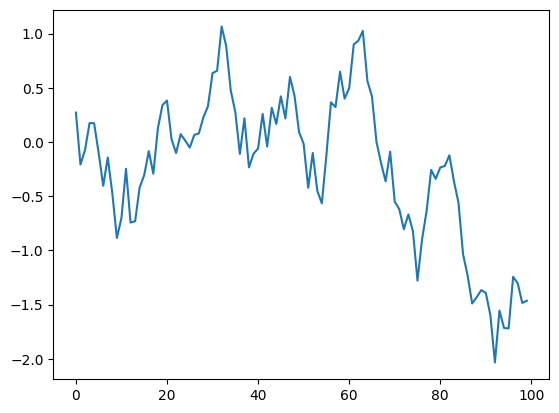

In [43]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)
y = np.cumsum(np.random.rand(100) - 0.5)
plt.plot(y)

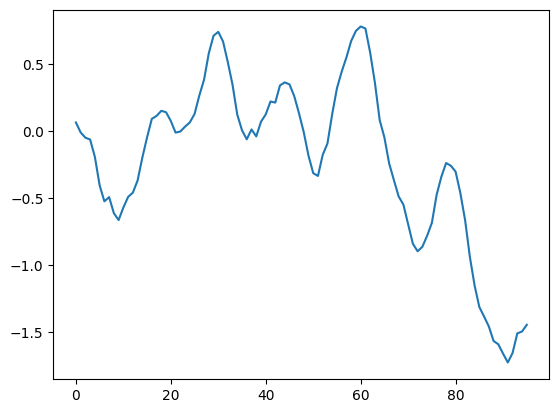

In [45]:

def moving_average_loop(arr, window_size):
    result = []
    for i in range(len(arr) - window_size + 1):
        window = arr[i:i + window_size]
        result.append(np.mean(window))
    return np.array(result)
plt.plot(moving_average_loop(y,5))
# plt.plot(y)
# plt.plot(z)

## Final Exercise (Post Lecture)

Implement the [Conway's game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) using numpy

In [ ]:
def Update(grid):
    """计算每个细胞的邻居数量"""
    rows, cols = grid.shape
    neighbors = np.zeros((rows, cols), dtype=int)
    # 8个方向的邻居贡献
    neighbors[1:, 1:]   += grid[:-1, :-1]  # 左上
    neighbors[1:, :]    += grid[:-1, :]    # 上
    neighbors[1:, :-1]  += grid[:-1, 1:]   # 右上
    neighbors[:, 1:]    += grid[:, :-1]    # 左
    neighbors[:, :-1]   += grid[:, 1:]     # 右
    neighbors[:-1, 1:]  += grid[1:, :-1]   # 左下
    neighbors[:-1, :]   += grid[1:, :]     # 下
    neighbors[:-1, :-1] += grid[1:, 1:]    # 右下
    next_grid=np.zeros(grid)
    # 规则1：活细胞有2或3个邻居时存活
    next_grid[(grid == 1) & ((neighbors == 2) | (neighbors == 3))] = 1

    # 规则2：死细胞有恰好3个邻居时复活
    next_grid[(grid == 0) & (neighbors == 3)] = 1

    return next_grid

    